# <font color='gray'> Lab 2: Classification I</font>

## Introduction 

The aim of this lab is to get experience with **classification problems**, the concepts of **optimization**, **regularization**, and **feature relevance**. This lab will use both **Python** and **Weka**. 

- This lab manual runs over two weeks (*Week 5* and *Week 6*). 
- It is also the **second assignment** and **should be delivered by the end of week 6 (for exact deadline, refer to the submission link on QM+)**.
- Exercises in <font color = 'maroon'>**red**</font> are assessed towards your final grade.

## Important notes about grading: 

- **PLAGIARISM** <ins>is an irreversible non-negotiable failure in the course</ins> (if in doubt what constitutes plagiarism, ask!). 
- The total assessed coursework is worth 30% of your final grade.
- There will be 5 assessed labs (including this one), each of which will be worth 6\% contribution (percentage of your final grade).
- The deadline for submitting each coursework is 17 days after release of each new lab note, (on Monday) at 10:00 AM.
- There will be no opportunity to submit after the deadline (the submission link will disappear).
- The report should be answers to the <font color = 'maroon'>**exercises in red**</font> only. This should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.). It should be well marked with your name, student number, which lab exercise it is (so, e.g. this is Lab 2: Classification I), which module, and demarcated with question numbers. 
- No means of submission other than the appropriate QM+ link is acceptable at any time -- before or after the deadline -- (so NO email attachments, etc.)
- The cases of Extenuating Circumstances (EC) has to go through the proper procedure of the school in due time. Here is [the link to booklet on the EC policy at QMUL](https://qmplus.qmul.ac.uk/mod/book/view.php?id=674515&chapterid=73697). Only the cases approved by the school in due time are considered.

## 0. Classification I

The	 point	 of	 this	exercise	is	 to	 understand:

>i)	**classification problems**;<br>
>ii)	the concepts of **optimization** in training of a parametric model, specifically, `Logistic Regression (MaxEnt)`;<br>
>iii) introduction to a non-parametric classifier, specifically, `KNN`.


## 1.  Warm up &mdash; Weka



The first exercise walks through doing classification in Weka.
#### 0. Load up the credit dataset in Weka (filename is `credit-g.arff`). This dataset is a credit scoring dataset, about whether a borrower repays their loan or not. Choose `Classify` tab in the main explorer window. You can try the two classifiers we learned about so far.


> **Note:** Recall that "Max Entropy" and "Logistic Regression" classifiers are the same thing. Weka uses the name of *Logistic Regression*.


> **a.** *Logistic Regression* classifier is under *Functions* → *Logistic*.
>
> **b.** *KNN* classifier is under *Lazy* → *IBk*. (IB: Instance Based)


#### 1. Run *LogisticRegression/Maximum Entropy* classifier. 


> **Note:** Make sure `Test Options` are set to `Cross-validation`, `Folds=10` as is the default. This means we are estimating the test performance through 10 splits of train on 9/10ths, test on 1/10th.


> **a.** The output window shows you the resulting accuracy ("correctly classified instances") as well which features turned out to be important cues for good or bad credit.
>
> **b.** Note the "confusion matrix" in the output window. This says whether the mistakes made were predicting a bad loan to be good, or vice-versa.


#### 2. Run the *KNN* classifier. The default setting is K=1.


> **a.** Click on the text line right of the choose box for KNN options. Here you
can set the K value of KNN. By setting K=4 you should be able to gain a few percent of
accuracy compared to the default K=1.
>
> **b.** There are 1000 instances in this dataset. Try setting K=999 and re-running KNN.

---
### <font color='maroon'>**Exercise 0:** What are the new correctly classified instances, and the new confusion matrix? Briefly explain the reason behind your observation. <ins>[1 mark]</ins></font>
---

## 2. `MaxEnt`/`Logistic-Regression` Classifier

In the following exercises, we will examine some **Python** code for **KNN** and **MaxEnt** to get a deeper understanding of the concepts and the strengths and limitations of each of these two classifiers.

0.   Load the following datasets (they are available in QM+): `lab2_0_test.csv`, and `lab2_0_train.csv` (i.e., *test* and *training*). 
  *Recall that you first need to upload them to this google colab VM from the pan  on the left (using `UPLOAD`).*

In [1]:
import pandas as pd

df_train = pd.read_csv("lab2_0_train.csv")
df_test = pd.read_csv("lab2_0_test.csv")

print('The first few rows of the train dataset (to get a feeling about the data):\n')
print(df_train.head())
print('-'*50+'\nSummary information about the train dataset:\n')
print(df_train.info())


The first few rows of the train dataset (to get a feeling about the data):

   Attribute_1  Attribute_2  Label
0     0.757835     0.275513      1
1     0.763449     0.451848      1
2     0.678829     0.281010      1
3     0.918177     0.480215      1
4     0.780102     0.324151      1
--------------------------------------------------
Summary information about the train dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
Attribute_1    101 non-null float64
Attribute_2    101 non-null float64
Label          101 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


 1. Let's plot the training dataset in the feature space (a.k.a. attribute space, or predictor space). Note that the `x` and `y` axes represent each of our two attributes (so we are dealing with a two-dimensional problem) and the class that each instance belongs to is denoted by a <font color = 'blue'>blue circle</font> (label 0) versus a <font color = 'red'>red cross</font> (label 1). Note that, of course, the choice of which class we label as 0 versus 1 is arbitrary, as long as we choose it once, and stick with it!

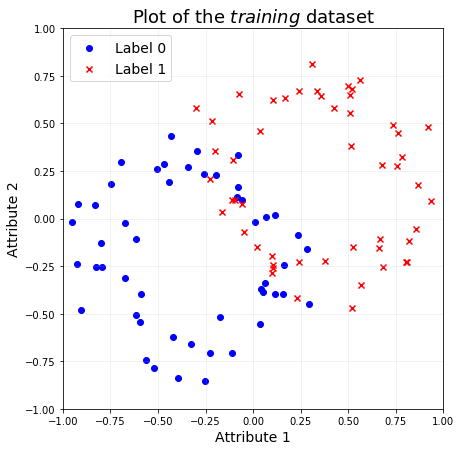

In [2]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

# split the data in df_train based on their class labels
df_train_Label_0 = df_train.loc[df_train['Label'] == 0]
df_train_Label_1 = df_train.loc[df_train['Label'] == 1]

# plot the data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(df_train_Label_0['Attribute_1'], 
            df_train_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', label = 'Label 0')
ax.scatter(df_train_Label_1['Attribute_1'], 
            df_train_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', label = 'Label 1')

# set a title and labels
ax.set_title('Plot of the $training$ dataset', fontsize = 18)
ax.set_xlabel("Attribute 1", fontsize = 14)
ax.set_ylabel("Attribute 2", fontsize = 14)

# set dimensions of x and y axes 
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(alpha=0.2)

# set legend
ax.legend(fontsize=14)

# show the plot
plt.show()


# # an alternative plotting library:

# import altair as alt

# df_train['Label']= df_train['Label'].astype('category')

# alt.Chart(df_train).mark_point(size=60).encode(
#     x = 'Attribute_1', 
#     y = 'Attribute_2', 
#     shape = 'Label',
#     color = 'Label',
#     tooltip=['Attribute_1','Attribute_2'],
# ).interactive()


---
> **Q0:** Is the data linearly separable?

> **A0:** (*Recall that you can use this space to write your answer by double-click on this cell. This is only for your own note-taking. The answers to the red exercises -- hence, **NOT** this one, for instance! -- should be written in a separate document and submitted through QM+ as a single **pdf** file, as for Lab 1.*) 
---

### The basics of the `MaxEnt` classifier.

Recall that a logistic regression makes use of the `logistic` function, which is also called `sigmoid` or `expit` function:
$$
f(t) =\frac{e^t}{e^t + 1} = \frac{1}{1 + e^{-t}}
$$
It takes a real value $t$, which will be associated with the distance of a point from the decision boundary, and returns a value between 0 and 1, i.e., a probability.

So let's see this function first! 

We can use the `expit` function from the scipy library:




In [0]:
from scipy.special import expit

# generate evenly spaced numbers over a specified interval
t = np.linspace(-10, 10, 1000)

# plot expit function of the generated data
plt.plot(t, expit(t), linewidth = 3)

# set plot parameters
plt.title('Expit fuction (from the scipy library)', fontsize=16)
plt.xlabel('t', fontsize=16)
plt.ylabel('f(t)', fontsize=16)
plt.grid(alpha = 0.2)
plt.ylim(0, 1)

# show the plot
plt.show()

Or we can even define it ourselves!


In [0]:
# define our own expit function
def my_expit(t):
  """
  Description
  ============
  The expit function, also known as the logistic function, 
  is defined as expit(x) = 1/(1+exp(-x)).
  
  Parameters
  ==========
  A numpy array
  
  Return
  ======
  A numpy array  
  """
  return  1. / (1. + np.exp(-t))

# generate evenly spaced numbers over a specified interval
t = np.linspace(-10, 10, 1000)

# plot expit function of the generated data
plt.plot(t, my_expit(t), linewidth = 3)

# set plot parameters
plt.title('Expit fuction (directly defined by ourselves)', fontsize=16)
plt.xlabel('t', fontsize=16)
plt.ylabel('f(t)', fontsize=16)
plt.grid(alpha = 0.2)
plt.ylim(0, 1)

# show the plot
plt.show()


---
> **Q1:** Inspecting the plot, what is the value of the expit function at zero? What is its value at large positive inputs? What is its value at large negative inputs? Check your answer with its algebraic relation $f(x) = \frac{1}{1 + e^{-x}}$.

>**A1:** 
---

Now, recall how logistic regression uses the above logistic function: We have a vector of weights, $\boldsymbol{w}=[w_0, w_1, w_2,\ldots,w_p]$. These constitute the parameters of the model. 

Given a new instance with attributes $\boldsymbol{x}=[1, a_1, a_2, \ldots, a_p]$, we first compute the inner product of the two, which is a real number, and pass it to the logistic function:

$$
Pr(label = 1) = \frac{1}{1+e^{-\boldsymbol{w}^T.\boldsymbol{x}}} = \frac{1}{1+e^{-[w_0+w_1x_1+\ldots+w_px_p]}}
$$


The following is the implementation of this function:



In [0]:
  def logisticRegressionBinaryClassifier(X, w):
    """
    Description
    ===========
    The logistic regression for a binary classifier.
    
    Parameters
    ==========
    X: A matrix containing the sample data.
       The first column should be all ones.
    w: weights of each attributes
    
    Return
    ======
    A numpy array
    """
    return expit(np.matmul(X, w.T))

In our example, we are dealing with a 2-dimensional problem, since we have only two attributes. Therefore, a logistic classifier is specified by three parameters: $w_0$, $w_1$ and $w_2$:

- $w_0$ is the intercept;
- $w_1$ is the weight of attribute 1;
- $w_2$ is the weight of attribute 2.

which we put in an array of weights $\boldsymbol{w}$, i.e., $\boldsymbol{w} = [w_0, w_1, w_2]$.


### Visualising the predictions of a given `MaxEnt` classifier.

Note that the output of the logistic regression is not directly a class label, but rather the **probability**. But how can we visualise this probability?


We are going to use colour: the background colour shows the probability that our classifier assigns to that point in the attribute space (a.k.a. feature space, or predictor space). The colour bar next to figure shows what value each colour represents. 


The following code shows the output for an example values of weights.
**Note** that the current values chosen for the weights of the classifier is terrible! Because it is predicting red for the samples from the blue class (circles), and blue for the ones from the red class (crosses)!. 

*Note: If you have an issue identifying colours, please contact me (i.e., the instructor).*



In [0]:
# generate evenly spaced numbers over a specified interval
att1 = np.linspace(-1, 1, 100)
att2 = np.linspace(-1, 1, 100)

# weights needed to calculate the probability that the label of a given sample is 1
# to have a good classifier, we need to find good weights
# weights -> (w0, w1, w1)
# probability = 1 / (1 + e ^ -(w0 + w1*x1 + w2*x2))
weights = np.array([0, -5, 0])

# generate the meshgrid of generated numbers
att1, att2 = np.meshgrid(att1, att2)

# create a matrix of possible values for x1 and x2
Xfull = np.c_[att1.ravel(), att2.ravel()]

# the first column of matrix is multiplied by w0, so it should be 'one' for all
Xfull = np.c_[np.ones(Xfull.shape[0]), Xfull]

# find the probability for each combination of x1 and x2 
probas = logisticRegressionBinaryClassifier(Xfull, weights)

# draw the color map for the calculated probabilities
# (this is added on top of the previous figure, which was showing the samples)
imshow_handle = ax.imshow(probas.reshape((100, 100)), 
                          cmap = 'jet', 
                          interpolation='none', 
                          extent = (-1, 1, -1, 1), 
                          origin = 'lower', 
                          alpha = 0.9)
# ax.contour(att1, att2, probas.reshape((100, 100)), levels=5)

# draw the color bar if it has not been drawn yet
if len(fig.axes) < 2: 
  cbar = fig.colorbar(imshow_handle, ax = ax, orientation = 'vertical')
  cbar.minorticks_on()

fig

---
### <font color='maroon'>**Exercise 1:** Try (by varying the values of weights in the code), and describe the effect of the following actions on the classifier (with a brief explanation): <ins>[0.5 mark]</ins>
- changing the first weight dimension, i.e., $w_0$?
- changing the second two parameters, $w_1$, $w_2$?
- negating all the weights?
- scaling the the second two weights up or down (e.g. dividing or multiplying both $w_1$ and $w_2$ by 10)?
  </font>
---

> **Q3:** Knowing the above, can you find a weight array that makes a reasonably good classifier for this dataset?

> **A3:**
---

The following code computes the accuracy of the predictor (specified by a given weight) when applied to some labelled samples: 

---
> **Q4:** Recall that the output of the logistic regression is a probability. But in order to compute the accuracy, we need the predicted labels (to compare with the actual labels). How can we convert the probability to a label? 
First, think of the answer yourself, then, inspecting the following code, find out which line is doing that.


> **A4:**
---

In [0]:
def computeAccuracy(X, w, Y):
  """
  Description
  ===========
  Compute the accuracy of the given weight (w).
  
  Parameters
  ==========
  X: A matrix containing the sample data.
     The first column should be all ones.
  w: Weights (w0, w1, w2)
  Y: An array of corresponding labels of each sample in 'X'.
  
  Return
  ======
  The accuracy percentage of a given weight.
  """
  
  # compute the logistic regression of a given weight and samples
  prediction_probab = logisticRegressionBinaryClassifier(X, w)
  
  # convert probabilities to a binary class
  threshold = 0.5
  prediction_binary = [int(probab > threshold) for probab in prediction_probab]

  # compute the accuracy of the given weights with comparing
  # predicted classes to actual ones.
  number_correct_classified_instances = 0
  for index in range(len(Y)):
    if prediction_binary[index] == Y[index]:
      number_correct_classified_instances += 1
  return number_correct_classified_instances/len(Y)
    

# Prepare sample data for computing the accuracy of the weight
Xtrain = df_train[['Attribute_1', 'Attribute_2']].values
Xtrain = np.c_[np.ones(Xtrain.shape[0]), Xtrain]
df_train_labels = df_train['Label'].values 

weights = np.array([0, -5, 0])
print('Train accuracy 1: {:.2f}'.format(computeAccuracy(Xtrain, weights, df_train_labels)))

# this is for the exercise
print('Train accuracy 2: {:.2f}'.format(computeAccuracy(Xtrain, -weights, df_train_labels)))


---
> **Q5:** Note that there are two outputs printed. What are them? Why did the accuray increase?

>**A5:**
---

### Training the logistic regression model: Optimisation - Exhaustive Search

In this section, we are going to investigate how does the training take place, i.e., how do we find the best weights of the logistic regression model. 

Recall from the class that a suitable measure of goodness of a classifier that returns probabilities (like logistic regression) is the likelihood function:

$$
L(\boldsymbol{w})=\prod_{y_i=0}\left(1-p(\boldsymbol{x}_i; \boldsymbol{w})\right) \prod_{y_i=1}p(\boldsymbol{x}_i; \boldsymbol{w})
$$

This is the likelihood that the labels in the training dataset is produced if the model is the true model (assuming instances are independent). Intuitively, if the true label is 1, we have a term $p(x)$ and if the true label is zero, we have a term of $1-p(x)$. So the best model has the highest value for the likelihood function.

To avoid prevision errors (since we are multiplying many probabilities), and also get a better behaving function, we take the (negative) of the log of the above product, which is called the `negative-log-likelihood` function:

$$
-\log L(\boldsymbol{w})=-\sum_{y_i=0}\log\left(1-p(\boldsymbol{x}_i; \boldsymbol{w})\right) -\sum_{y_i=1}\log p(\boldsymbol{x}_i; \boldsymbol{w})\\
= -\sum_{y_i}[(1-y_i)\log\left(1-p(\boldsymbol{x}_i; \boldsymbol{w})\right) +y_i\log p(\boldsymbol{x}_i; \boldsymbol{w})]
$$

Note that the "negative log likelihood" is now a "loss" function, so  for the best model, we have to minimise it. 

The following function computes the negative-log-likelihood given the weight parameters of a logistic regression and a labelled dataset. (There is a also a LAMBDA for regularisation!)

In [0]:
def negLogLikelihood(X, w, Y, LAMBDA = 0.01):
  """
  Description
  ===========
  Compute negative log likelihood of a dataset under logistic regression 
  classifier.
  
  Parameters
  ==========
  X: A matrix containing the sample data.
     The first column should be all ones.
  w: Weights, e.g. w = [w0, w1, w2]
  Y: An array of corresponding labels of each sample in 'X'.
  LAMBDA: coefficient of the 'regularisation' penalty. 
         Default value is set to '0.01'.

  Return
  ======
  neg_log_likelihood: it is the loss value of the current classifier specified
  by a weight vector and given labelled dataset.
  """
  
  prediction_probab = logisticRegressionBinaryClassifier(X, w)
  neg_log_likelihood = -np.sum(Y * np.log(prediction_probab) +
                             (1 - Y) * np.log(1 - prediction_probab)) + LAMBDA * np.matmul(w, w.T)
  
  return neg_log_likelihood

Let's try it on our training dataset for an example weights:

In [0]:
Xtr = df_train[['Attribute_1','Attribute_2']].values
Xtr = np.c_[np.ones(Xtr.shape[0]), Xtr]
Ytr = df_train['Label'].values

weights = np.array([0, -5, 0]) # weights of the logistic regression classifier

print('Negative Log Likelihood 1: {:.3f}'.format(negLogLikelihood(Xtr, weights, Ytr)))
print('Negative Log Likelihood 2: {:.3f}'.format(negLogLikelihood(Xtr, -weights, Ytr)))


---
> **Q6:** Note that there are two outputs printed. What are they? How and why has the value chanegd? 

> **A6:**
---

So far we have a loss function (negative-log-likelihood) that we can use to find the best weights of our model. But how? A trivial approach is  to
implement an exhaustive search algorithm, that tries different combinations of the weights and finds the one that gives the lowest value of the loss function:

In [0]:
from itertools import product

Xtr = df_train[['Attribute_1','Attribute_2']].values
Xtr = np.c_[np.ones(Xtr.shape[0]), Xtr]
Ytr = df_train['Label'].values


lw0 = np.linspace(-1, 1, 20)
lw1 = np.linspace(-1, 1, 20)
lw2 = np.linspace(-1, 1, 20)

all_possible_weights = product(lw0, lw1, lw2)
lowest_loss = np.Infinity

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
for i, weights in enumerate(all_possible_weights):
  current_loss = negLogLikelihood(Xtr, np.array(weights), Ytr)
  if current_loss < lowest_loss:
    best_weights = np.array(weights)
    lowest_loss = current_loss
    print('a new best found = {:8.5f} --- '.format(current_loss), end='')
    print('accuracy: {:.2f} --- '.format(computeAccuracy(Xtr, best_weights, Ytr)), end='')
    print('weights = {}'.format(best_weights))

    
print('\nThe best weight vector found using exhaustive search is: {}'.format(best_weights))



---
### <font color='maroon'>**Exercise 1:** (a) How many times did your loop execute? (b) Report your classifier weights that first get you at least 75% train accuracy. <ins>[0.25 + 0.25 = 0.5 mark]</ins></font>
---

---
>**Q7:** For a challenging question: You should notice that there is a consensus between the general trend in the loss function and the accuracy measure (both are improving). But there are some small deviations from this general trend: there are cases where the loss function improves but not the accuracy, although both of them are measured on the train data. Can you provide any justification why this could happen at all?

>**A7:**
---

In order to (literally!) see the progress of how the exhaustive search finds the best weights, we are going to make an animation. Execute the following code, but keep in mind that it may take up to a minute to finish baking your animation!

In [0]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec



att1 = np.linspace(-1, 1, 50)
att2 = np.linspace(-1, 1, 50)

att1, att2 = np.meshgrid(att1, att2)

Xfull = np.c_[att1.ravel(), att2.ravel()]
Xfull = np.c_[np.ones(Xfull.shape[0]), Xfull]

# plt.style.use('classic')

lw0 = np.linspace(-2, 2, 4)
lw1 = np.linspace(-2, 2, 4)
lw2 = np.linspace(-2, 2, 4)


all_possible_weights = [np.array(w) for w in product(lw0, lw1, lw2)]
figg = plt.figure(figsize=(15, 15))
# figg = plt.figure(constrained_layout=True)

axx0 = figg.add_subplot(231)
axx1 = figg.add_subplot(232)
axx2 = figg.add_subplot(233)
axx3 = figg.add_subplot(212)

weights_bar = axx0.bar(['w0', 'w1', 'w2'],[lw0[-1], lw1[-1], lw2[-1]])
axx0.set_ylim((-6.1,6.1))
axx1.scatter(df_train_Label_0['Attribute_1'], 
            df_train_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', )
axx1.scatter(df_train_Label_1['Attribute_1'], 
            df_train_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', )
axx1.set_xlim(-1, 1)
axx1.set_ylim(-1, 1)
axx1.grid(alpha = 0.2)
probas = logisticRegressionBinaryClassifier(Xfull, np.array([lw0[-1], lw1[-1], lw2[-1]]))
im_handle = axx1.imshow(probas.reshape(att1.shape), cmap='jet', 
                          interpolation='none', extent=(-1, 1, -1, 1), 
                          origin='lower', alpha=0.9)

line, = axx2.plot([], [], linewidth=1, marker='.', )
loss_measures = []
axx2.grid()

axx2.set_xlim((0, len(all_possible_weights)))
axx2.set_ylim((0, 200))


axx3.set_aspect('equal')
axx3.scatter(df_train_Label_0['Attribute_1'], 
            df_train_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', )
axx3.scatter(df_train_Label_1['Attribute_1'], 
            df_train_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', )
im_handle_of_best = axx3.imshow(probas.reshape(att1.shape), cmap='jet', 
                          interpolation='none', extent=(-1, 1, -1, 1), 
                          origin='lower', alpha=0.9)

lowest_loss = np.Infinity
best_weights = np.array([lw0[-1], lw1[-1], lw2[-1]])

textstr = '\n'.join((
    r'$loss=%.2f$' % (lowest_loss,),
    r'$weights=[%.2f,%.2f,%.2f]$' % (best_weights[0], best_weights[1], best_weights[2]),
    r'$Train accuracy=%.2f$' % (0), ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
textbox3 = axx3.text(1.05, 0.95, textstr, transform=axx3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


def update_weights(weights):
  global lowest_loss, best_weights
  # updating the weights bar plot:
  for i, bar in enumerate(weights_bar):
    bar.set_height(weights[i])
    
  # updating the probability colormap plot:
  Yfull = np.matmul(weights, Xfull.T)
  probas = my_expit(Yfull)
  im_handle.set_data(probas.reshape(att1.shape))
  
  # updating the loss measures plot
  current_loss = negLogLikelihood(Xtr, weights, Ytr)
  loss_measures.append(current_loss)
  line.set_data(range(len(loss_measures)), loss_measures)
  
  # update the best classifier so far:
  if current_loss < lowest_loss:
    best_weights = weights
    lowest_loss = current_loss
    im_handle_of_best.set_data(probas.reshape(att1.shape))
    textstr = '\n'.join((
    r'$loss=%.2f$' % (lowest_loss,),
    r'$weights=[%.2f,%.2f,%.2f]$' % (best_weights[0], best_weights[1], best_weights[2]),
    r'$Train\ accuracy=%.2f$%%' % (computeAccuracy(Xtrain, best_weights, df_train_labels)), ))
    textbox3.set_text(textstr)
    

print('Please wait while the animation is being rendered ... ')
anim = animation.FuncAnimation(figg, update_weights, 
                               frames=all_possible_weights,
                               interval =100,
                               repeat=False,
                               blit=False)

HTML(anim.to_html5_video())

---
> **Q7:** Describe what each of these 4 figures represent.

>**A7:**
---

---
> **Q8:** Explain why in the curve in the third figure is so jagged and jumps up and down!

> **A8:**
---

---
>**Q9:** How many different weights does this exhaustive search try here? Try to improve the output of the algorithm by increasing the number of possible weights. Note that this will effect your running time.

> **A9:**
---

Let's compute te accuracy of the best found model:

In [0]:
# Accuracy of the computed optimized weights on the testing dataset.
Xtest = df_test[['Attribute_1', 'Attribute_2']].values
Xtest = np.c_[np.ones(Xtest.shape[0]), Xtest]
df_test_labels = df_test['Label'].values
print('Test accuracy: {:.2f}'.format(computeAccuracy(Xtest, best_weights, df_test_labels)))

### Training the logistic regression model: Optimisation - Gradient Descent

The previous algorithm is inefficient. Let's look for a better way to optimise the classifier. In particular, instead of just try all different values of weights blindly, we are going to do the following:

- start from an initial value of the weights;
- then in each step, update the weights along the direction ``suggested by'' the derivative (technically, the gradient) of the loss function.  
- stop depending on some stopping criteria (will be part of your questions!)

So we need a function that computes the gradient of our loss function at a given point. Here is it:

In [0]:
def negLogLikelihoodGradient(X, w, Y, LAMBDA = 0.01):
  
  """
  Description
  ===========
  Compute the gradient of the negative log likelihood loss function for a
  dataset under logistic regression classifier.
  
  Parameters
  ==========
  X: A matrix containing the sample data.
     The first column should be all ones.
  w: Weights e.g. w = [w0, w1, w2]
  Y: An array of corresponding labels of each sample in 'X'.
  LAMBDA: coefficient of the 'regularisation' penalty. 
         Default value is set to '0.01'.

  Return
  ======  
  gradient_neg_log_likelihood: it is the gradient of the loss function with
  respect to the weights, i.e., the vector of d[p(X,Y|w)]/dw, computed at a 
  given w for a given training dataset X.
  """
    
  prediction_probab = logisticRegressionBinaryClassifier(X, w)
  
  Xprob = Y - prediction_probab
  gradient_neg_log_likelihood = -np.matmul(X.T, Xprob) + 2. * LAMBDA * w
  
  
  return gradient_neg_log_likelihood


Here is an example of computing the gradient:

In [0]:
weights = np.array([0, -1, 1])

# Prepare sample data for computing the accuracy of the weight
Xtrain = df_train[['Attribute_1', 'Attribute_2']].values
Xtrain = np.c_[np.ones(Xtrain.shape[0]), Xtrain]
df_train_labels = df_train['Label'].values  

negLL = negLogLikelihood(Xtrain, weights, df_train_labels)
gradientLL = negLogLikelihoodGradient(Xtrain, weights, df_train_labels)
print ('loss function (negative-log-likelihood): {:.2f}'.format(negLL))
print ('gradient of the loss function:\t\t {}'.format(gradientLL))
print('Train accuracy:\t\t\t\t {:.2f}'.format(computeAccuracy(Xtrain, weights, df_train_labels)))

Now, lets update the weights using the gradient:

In [0]:
step_size = 0.1

# update the weights by moving a small step in the opposite direction of 
# the gradient:
weights = weights - step_size * gradientLL

negLL = negLogLikelihood(Xtrain, weights, df_train_labels)
gradientLL = negLogLikelihoodGradient(Xtrain, weights, df_train_labels)

print ('loss function (negative-log-likelihood): {:.2f}'.format(negLL))
print ('gradient of the loss function at this new point: {}'.format(gradientLL))

print('Train accuracy: {:.2f}'.format(computeAccuracy(Xtrain, weights, df_train_labels)))


---
> **Q10:** Compare the new value of the loss function with its value in the previous step. Describe the change and explain why this happened.

>**A10:**
---

---
### <font color='maroon'>**Exercise 2:** (a) Notice that we used the negative of the gradient to update the weights. Explain why. (b) Given the gradient at the new point, determine (in terms of "increase" or "decrease", no need to give values), what we should do to each of $w_0$, $w_1$ and $w_2$ to further improve the loss function. <ins>[0.5 + 0.5 = 1 mark]</ins></font>
---

---
### <font color='maroon'>**Exercise 3:** Suppose we wanted to turn this step into an algorithm that sequentially takes such steps to get to the optimal solution. What is the effect of "step-size"? Your answer should be in terms of the trade-offs, i.e., pros and cos, in choosing a big value for step-size versus a small value for step-size. <ins>[0.25 + 0.25 = 0.5 mark]</ins></font>
---

---
### <font color='maroon'>**Exercise 4:** Answer this question either by doing a bit of research, or looking at some source codes, or thinking about them yourself: (a) Argue why choosing a constant value for `step_size`, whether big or small, is not a good idea. A better idea should be to change the value of step-size along the way. Explain whether the general rule should be to decrease the value of step-size or increase it. (b) Come up with the stopping rule of the gradient descent algorithm which was described from a high level at the start of this section. That is, come up with (at least two) rules that if either one of them is reached, the algorithm should stop and report the results. <ins>[0.5 + 0.5 = 1 mark]</ins></font>
---

Instead of implementing the gradient descent algorithms ourselves, we are going to use the `minimize` function from the `optimization` module implemented as part of the `scipy` package. It takes a (callable) loss function, its gradient (also as a callable function, and an initial solution, along with some other parameters, like tolerance, and outputs the final solution found as optimal. 

In [0]:
import scipy.optimize
np.set_printoptions(formatter={'float': '{: 0.10f}'.format})


# Initial guess of weights
initial_weights = np.array([1, -1, 1])

# Prepare sample data for computing the accuracy of the weight
Xtrain = df_train[['Attribute_1', 'Attribute_2']].values
Xtrain = np.c_[np.ones(Xtrain.shape[0]), Xtrain]
df_train_labels = df_train['Label'].values

# The loss function to be minimized (the objective function)
def obj_func(w):
  return negLogLikelihood(Xtrain, w, df_train_labels)

# The gradient of loss function.
def grad_func(w):
  return negLogLikelihoodGradient(Xtrain, w, df_train_labels)

# In order to store the path that the optimisation takes to get to the optimal 
# point, we create the following callback function
# source for this one: 
# http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb
  
path_ = [initial_weights] # putting the first solution here.

# use scipy to calculate the optimal values for weights.

# use scipy to calculate the optimal values for weights.
# the intermediate points will be appended to the path
res = scipy.optimize.minimize(fun = obj_func, x0 = initial_weights, 
                              jac = grad_func, tol=1e-6, 
                              callback=make_minimize_cb(path_))

path = np.array(path_)[:,1:].T


print('computed optimal weights:\t\t {}'.format(res.x))

negLL = negLogLikelihood(Xtrain, res.x, df_train_labels)
gradientLL = negLogLikelihoodGradient(Xtrain, res.x, df_train_labels)
print ('optimal loss (negative-log-likelihood):\t {:.4f}'.format(negLL))
print ('gradient at the optimum point:\t\t {}'.format(gradientLL))
print('Train accuracy:\t\t\t\t {:.2f}'.format(computeAccuracy(Xtrain, res.x, df_train_labels)))

# Accuracy of the computed optimized weights on the testing dataset.
Xtest = df_test[['Attribute_1', 'Attribute_2']].values
Xtest = np.c_[np.ones(Xtest.shape[0]), Xtest]
df_test_labels = df_test['Label'].values
print('Test accuracy:\t\t\t\t {:.2f}'.format(computeAccuracy(Xtest, res.x, df_test_labels)))


print('\n\nAnd here are all the intermediate solutions the algorithm visited to get to the optimal solution:\n')
for w in path_:
  print('[w_0, w_1, w_2] = {}'.format(w))


---
> **Q11:** Note that the above code also prints -- in the 3rd line -- the value of the gradient at the final "optimal" point.  What do you expect this gradient to be, if the point is truly the optimal point? Does it match what you expect? 

>**A11:** 
---

---
> **Q12:** Note that the `minimize` function (line 39 of the code), takes a parameter called `tol` as well. What is used for? Try different meaningful values for it and describe the effect.

>**A12:** 
---

---
> **Q13:** The `minimize` function takes an initial value as the starting point of the optimization, i.e., an initial guess for the solution, as well (passed as `x0` argument). Try different values for it and describe the effect.

>**A13:** 
---

Now, in order to visually see the progress made along the way using the gradient descent algorithm, and get a better comparison, let's recreate the animation we did for the exhaustive search approach:

In [0]:
%matplotlib notebook

import matplotlib.pyplot as plt

att1 = np.linspace(-1, 1, 50)
att2 = np.linspace(-1, 1, 50)

att1, att2 = np.meshgrid(att1, att2);

Xfull = np.c_[att1.ravel(), att2.ravel()]
Xfull = np.c_[np.ones(Xfull.shape[0]), Xfull]

figg = plt.figure(figsize=(15, 15))

axx0 = figg.add_subplot(231);
axx1 = figg.add_subplot(232);
axx2 = figg.add_subplot(233);
axx3 = figg.add_subplot(212);

initial_weights = np.array([1,1,1]);
path_ = [initial_weights] 
res = scipy.optimize.minimize(fun = obj_func, x0 = initial_weights, 
                              jac = grad_func, tol=1e-6, 
                              callback=make_minimize_cb(path_))


weights_bar = axx0.bar(['w0', 'w1', 'w2'], initial_weights);
axx0.set_ylim((-6.1,6.1));
axx1.scatter(df_train_Label_0['Attribute_1'], 
            df_train_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', );
axx1.scatter(df_train_Label_1['Attribute_1'], 
            df_train_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', );
axx1.set_xlim(-1, 1);
axx1.set_ylim(-1, 1);
axx1.grid(alpha = 0.2);
probas = logisticRegressionBinaryClassifier(Xfull, initial_weights)
im_handle = axx1.imshow(probas.reshape(att1.shape), cmap='jet', 
                          interpolation='none', extent=(-1, 1, -1, 1), 
                          origin='lower', alpha=0.9);

line, = axx2.plot([], [], linewidth=1, marker='.', );
loss_measures = []
axx2.grid();

axx2.set_xlim((0, len(all_possible_weights)));
axx2.set_ylim((0, 200));


axx3.set_aspect('equal');
axx3.scatter(df_train_Label_0['Attribute_1'], 
            df_train_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', );
axx3.scatter(df_train_Label_1['Attribute_1'], 
            df_train_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', );
im_handle_of_best = axx3.imshow(probas.reshape(att1.shape), cmap='jet', 
                          interpolation='none', extent=(-1, 1, -1, 1), 
                          origin='lower', alpha=0.9);

lowest_loss = np.Infinity
best_weights = initial_weights

# the values here are just dummy place-holders!
textstr = '\n'.join((
    r'$loss=%.2f$' % (np.Inf,),
    r'$weights=[%.2f,%.2f,%.2f]$' % (0, 0, 0),
    r'$Train accuracy=%.2f$' % (0), ));

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5);

# place a text box in upper left in axes coords
textbox3 = axx3.text(1.05, 0.95, textstr, transform=axx3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);


def update_weights(weights):
  global lowest_loss, best_weights
  # updating the weights bar plot:
  for i, bar in enumerate(weights_bar):
    bar.set_height(weights[i]);
    
  # updating the probability colormap plot:
  Yfull = np.matmul(weights, Xfull.T)
  probas = my_expit(Yfull)
  im_handle.set_data(probas.reshape(att1.shape));
  
  # updating the loss measures plot
  current_loss = negLogLikelihood(Xtr, weights, Ytr)
  loss_measures.append(current_loss)
  line.set_data(range(len(loss_measures)), loss_measures);
  
  # update the best classifier so far:
  if current_loss < lowest_loss:
    best_weights = weights
    lowest_loss = current_loss
    im_handle_of_best.set_data(probas.reshape(att1.shape));
    textstr = '\n'.join((
    r'$loss=%.2f$' % (lowest_loss,),
    r'$weights=[%.2f,%.2f,%.2f]$' % (best_weights[0], best_weights[1], best_weights[2]),
    r'$Train\ accuracy=%.2f$%%' % (computeAccuracy(Xtrain, best_weights, df_train_labels)), ));
    textbox3.set_text(textstr);
    

print('Please wait while the animation is being rendered ... ')
anim = animation.FuncAnimation(figg, update_weights, 
                               frames=path_,
                               interval =100,
                               repeat=False,
                               blit=False);
display(HTML(anim.to_html5_video()))

---
> **Q12:** Note that the third figure, unlike in exhaustive search, is no longer jagged (like saw-tooth!), and instead has a consistent trend downward. Why? Also explain why it has a sharp trend downward at the beginning but then it sort of "plateaus"  and the reductions are no longer as significant.

> **A12:**
---


Although the above graphics were helpful!, it is not exactly showing us the mechanism of the gradient descent. In what follows, we will try to visualise the actual gradient descent in action. However, we have an issue: the loss function has three arguments, $w_0$, $w_1$ and $w_2$, so to visualise the loss function, we would need 4 visual dimensions! (why?) 

Because we can really visualise only 3 spatial dimensions, something has to be sacrificed here: we are going to set the value of one of the parameters as fixed, and only vary the other two. For instance, in the following code, we are fixing the value of $w_0$ at its optimal (which we already computed in from the previous steps). So we can now pretend that our loss function has only two parameters $w_1$ and $w_2$, and hence, we can now plot it in 3D:

In [0]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
%matplotlib inline

import matplotlib.pyplot as plt

def loss(w1, w2):
  return negLogLikelihood(Xtrain, np.array([res.x[0], w1, w2]), df_train_labels)

np_loss = np.frompyfunc(loss, 2, 1)

def loss_gradient(w1, w2):
  return negLogLikelihoodGradient(Xtrain, np.array([res.x[0], w1, w2]), df_train_labels)[1:]

np_loss_gradient = np.frompyfunc(loss_gradient, 2, 1)

minima_ = np.array([res.x[1],  res.x[2]])



xmin, xmax, xstep = -2.5, 12.5, .2
ymin, ymax, ystep = -2.5, 12.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = np_loss(x, y)


fig1 = plt.figure(figsize=(8, 5))
ax1 = plt.axes(projection='3d', elev=50, azim=-50)

ax1.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.7, cmap=plt.cm.jet)

ax1.scatter3D(*minima_, loss(*minima_), marker='*', color='y', s=150)


ax1.set_xlabel('$w_1$', fontsize=14)
ax1.set_ylabel('$w_2$', fontsize=14)
ax1.set_zlabel('L',)

ax1.set_xlim((xmin, xmax))
ax1.set_ylim((ymin, ymax))

plt.show()


So, let us see the gradient descent on this function:

In [0]:
from matplotlib import animation
from IPython.display import HTML

initial_weights = np.array([0, -1, 1])

  
path_ = [initial_weights]

# use scipy to calculate the optimal values for weights.
res = scipy.optimize.minimize(fun = obj_func, x0 = initial_weights, 
                              jac = grad_func, tol=1e-6, callback=make_minimize_cb(path_))

path = np.array(path_)[:,1:].T


# gradient = np_loss_gradient(x, y)
# pick_first = np.vectorize(lambda x: x[0])
# pick_second = np.vectorize(lambda x: x[1])

# dz_dx = pick_first(gradient)
# dz_dy = pick_second(gradient)

fig2, ax2 = plt.subplots(figsize=(10, 6))

ax2.contour(x, y, z, levels=np.logspace(0, 3, 50), norm=LogNorm(), cmap=plt.cm.jet)
ax2.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax2.plot(*minima_, 'r*', markersize=18)

ax2.set_xlabel('$w_1$')
ax2.set_ylabel('$w_2$')

ax2.set_xlim((xmin, xmax))
ax2.set_ylim((ymin, ymax))

plt.show()



---
> **Q14:** Explain what you see. In particular, explain what are the "contour lines", what is the point demarcated by a red asterisk, what are the black arrows, what space is this in?

>**A14:**
---

And let's animate the steps!:

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 3, 50), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Gradient-Descent', lw=2, marker='o')
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point
  
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=120, 
                               repeat_delay=5, blit=True)


HTML(anim.to_html5_video())


# fig = plt.figure(figsize=(8, 5))
# ax = plt.axes(projection='3d', elev=50, azim=-50)

# ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
# ax1.scatter(*minima_, loss(*minima_), marker='*', color='r', s=200)

# # line, = ax.plot([], [], [], 'b', label='Gradient-Descent', lw=2)
# point = ax.scatter([], [], [], 'bo')

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_zlabel('$z$')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))

# def init():
# #     line.set_data([], [])
# #     line.set_3d_properties([])
# #     point.set_data([], [])
#     point.set_3d_properties([])
#     return point
  
# def animate(i):
# #     line.set_data(path[0,:i], path[1,:i])
# #     line.set_3d_properties(np_loss(*path[::,:i]))
#     point.set_data(path[0,i-1:i], path[1,i-1:i])
#     point.set_3d_properties(np_loss(*path[::,i-1:i]))
#     return point
  
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=path.shape[1], interval=60, 
#                                repeat_delay=5, blit=True)

# HTML(anim.to_html5_video())

---
### <font color='maroon'>**Exercise 5:**Provide one advantage and one disadvantage of using exhaustive search for optimisation, especially in the context of training a model in machine learning. <ins>[0.25+0.25 = 0.5 mark]</ins></font>
---

## 3. Logistic Regression (MaxEnt) versus KNN

Load a new datasets (test and train), from our other csv files (that you uploaded here!):

In [0]:
df_testt = pd.read_csv('lab2_1_test.csv')
df_trainn = pd.read_csv('lab2_1_train.csv')

Let's plot the training dataset. It classifies the 2D training dataset with two classes shown (i.e., Labels: $0$ and $1$).

In [0]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# import numpy as np
import matplotlib.pyplot as plt

# split data in df_train to two class labels
df_trainn_Label_0 = df_trainn.loc[df_trainn['Label'] == 0]
df_trainn_Label_1 = df_trainn.loc[df_trainn['Label'] == 1]

# plot data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

ax.scatter(df_trainn_Label_0['Attribute_1'], 
            df_trainn_Label_0['Attribute_2'], 
            c = 'b', marker = 'o', label = 'Label 0')
ax.scatter(df_trainn_Label_1['Attribute_1'], 
            df_trainn_Label_1['Attribute_2'], 
            c = 'r', marker = 'x', label = 'Label 1')

# set a title and labels
ax.set_title('Plot $training$ dataset', fontsize=14)
ax.set_xlabel("Attribute 1", fontsize=12)
ax.set_ylabel("Attribute 2", fontsize=12)

# set dimensions of x and y axes 
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.grid(alpha = 0.2)

# set legend
ax.legend(fontsize=12)

# show the plot
plt.show()


 Let's run `Logistic Regression` (`MaxEnt`) to classify this dataset.

In [0]:
import scipy

# Initial guess of weights
initial_weights = np.array([0, -1, 1])

# Prepare sample data for computing the accuracy of the weight
Xtrainn = df_trainn[['Attribute_1', 'Attribute_2']].values
Xtrainn = np.c_[np.ones(Xtrainn.shape[0]), Xtrainn]
df_trainn_labels = df_trainn['Label'].values

# The loss function to be minimized (the objective function)
def obj_func(w):
  return negLogLikelihood(Xtrainn, w, df_trainn_labels)

# The gradient of loss function.
def grad_func(w):
  return negLogLikelihoodGradient(Xtrainn, w, df_trainn_labels)

# use scipy to calculate the optimize values for weights.
res = scipy.optimize.minimize(fun = obj_func, x0 = initial_weights, 
                              jac = grad_func, tol=1e-6)
print('Computed optimized weights: ', res.x)

# Accuracy of the computed optimized weights on training dataset.
negLL =  obj_func(res.x)
gradientLL = grad_func(res.x)

print ('llh:\t', negLL)
print ('dLLh:\t', gradientLL)
print('Train accuracy: {:.2f}%'.format(computeAccuracy(Xtrainn, res.x, df_trainn_labels)))

# Accuracy of the computed optimized weights on the testing dataset.
Xtestt = df_testt[['Attribute_1', 'Attribute_2']].values
Xtestt = np.c_[np.ones(Xtestt.shape[0]), Xtestt]
df_testt_labels = df_testt['Label'].values
print('Test accuracy: {:.2f}%'.format(computeAccuracy(Xtestt, res.x, df_testt_labels)))

---
> **Q15:** Explain why `Logistic Regression (MaxEnt)` is not a good choice of a classifier for this dataset



> **A15:** 
---


Now, instead of `Logistic Regression (MaxEnt)`, let's classify with `KNN`. 

First, let's see the decision regions of the KNN classifer generated from this training dataset for a few different values of K. 

The plots should appear in different tabs. If they don't try running the cell twice!

In [0]:
# Don't forget to run this cell twice to get the tabs. 
# If you don't get the tab view, it is fine, you can still analyse the outputs!

from google.colab import widgets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from itertools import chain


# source for this part inspired from: 
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html


# Create color maps
cmap_light = ListedColormap(['#AAAAFF','#FFAAAA'])
# cmap_bold = ListedColormap(['#0000FF', '#FF0000'])


K_values = list(range(1, 10, 2))
K_values.append(40)

X = Xtrainn[:,1:] # we don't need the all ones columns any more!

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


tb = widgets.TabBar([str(K) for K in K_values])
for K in K_values:
  with tb.output_to(str(K), select= (K < 2)):
    
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    
    
    clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean')
    clf.fit(X, df_trainn_labels)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


    ax.scatter(df_trainn_Label_0['Attribute_1'], 
                df_trainn_Label_0['Attribute_2'], 
                c = 'b', marker = 'o', label = 'Label 0')
    ax.scatter(df_trainn_Label_1['Attribute_1'], 
                df_trainn_Label_1['Attribute_2'], 
                c = 'r', marker = 'x', label = 'Label 1')

    # set a title and labels
    ax.set_title('Decision Regsions of KNN for K={}'.format(K), fontsize=14)
    ax.set_xlabel("Attribute 1", fontsize=12)
    ax.set_ylabel("Attribute 2", fontsize=12)

    # set dimensions of x and y axes 
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim( X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.grid(alpha = 0.2)

    # set legend
    ax.legend(loc='upper left', fontsize=12)

    # show the plot
    plt.show()

    
#     print('K={}'.format(K))

If you couldn't see it before, it should now become relatvely more clear that the
two classes are arranged in a spiral.

---
> **Q16:** Describe (and briefly explain) the effect of the following on the decision regions:<br>
>(a) K
>(b) changing the "weights" parameter of the KNN classifier from `uniform` to `distance` (in line 40 of the code). You may want to consult with the [documentation page of this on skitlearn:](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)<br>
>(c) changing the "metric" parameter of the KNN classifier from `eucledean` to `cityblock` and `cosine`. It is worthwhile to check the [documentation from sklearn on this one](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) too.


>**A16:**
---

### Picking the best K for KNN:

In order to pick the best K, we first need a measure of evaluation, i.e., how good a classifier is:

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=K)

KNN_classifier.fit(X, df_trainn_labels)
X_test = Xtestt[:,1:]
Y_test_pred = KNN_classifier.predict(X_test)


# Evaluating the Algorithm on test data:

from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix on the test data for KNN with K={}:\n'.format(K))
print(confusion_matrix(df_testt_labels, Y_test_pred))
print('\nClassification report on the test data for KNN with K={}:\n'.format(K))
print(classification_report(df_testt_labels, Y_test_pred))

# Now for educational purposes (!) let's evaluate on the train data as well:
Y_train_pred = KNN_classifier.predict(X)
print('\n\n'+'-'*60+'\n\n')
print('Confusion matrix on the train data for KNN with K={}:\n'.format(K))
print(confusion_matrix(df_trainn_labels, Y_train_pred))
print('\nClassification report on the train data for KNN with K={}:\n'.format(K))
print(classification_report(df_trainn_labels, Y_train_pred))

---
>**Q17:** Describe/interpret the numerical reports, and explain why using the train data is not helpful in finding the best value for K in KNN. 

>**A17:**
---

How do we choose the best K then? As with any hyper-parameter, with **validation**:



In [0]:
# Investigating validation error rate for K between 1 and 40
error_test = []
# error_train = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X, df_trainn_labels)
    pred_test_k = knn.predict(X_test)
    error_test.append(np.mean(pred_test_k != df_testt_labels))
#     pred_train_k = knn.predict(X)
#     error_train.append(np.mean(pred_train_k != df_trainn_labels))

    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_test, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Validation error rate')
# plt.plot(range(1, 40), error_train, color='green', linestyle='dashed', marker='.',
#          markerfacecolor='black', alpha=0.4, markersize=10, label='train error rate')
plt.title('error rate vs K values (for choosing the best K)')
plt.xlabel('K', fontsize=16)
plt.ylabel('error rate', fontsize=16)    
plt.ylim(0,0.5)
plt.xlim(0,40)
plt.legend(fontsize=16)
plt.grid()
    

---
### <font color='maroon'>**Exercise 6:** (a) What is the best value for $K$? Explain how you got to this solution. (b) Interpret the main trends in the plot. In partiular, specify which parts correspond to under-fitting and which part with over-fitting.    <ins>[0.5+0.5 = 1 mark]</ins></font>
---

---
### <font color='maroon'>**Exercise 7:** Given what you learned from this entire lab(!), provide one advantage and one disadvantage of using MaxEnt vs KNN. <ins>[0.25+0.25 = 0.5 mark]</ins></font>
---